In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Импортируем нужные библиотеки

### Считывание и обработка данных

In [246]:
df = pd.read_excel("200_выпусков_'О_мой_питч!'_OutOfScope_update.xlsx", sheet_name='Лист2')
df = df.rename(columns={'Инвестиции' : 'Инвестиции(руб)', 'Без' : 'Воздержалось'})
df['За'] = pd.to_numeric(df['За'], errors='coerce')
df['Против'] = pd.to_numeric(df['Против'], errors='coerce')
df['Воздержалось'] = pd.to_numeric(df['Воздержалось'], errors='coerce')
df = df.drop(columns='№')
df = df.drop(index=82) #Дропаем строку в бизнесом, о котором нет данных
df = df.drop_duplicates(subset='Название')
pd.set_option('display.max_colwidth', None)  # 150 означает ограничение на кол-во символов в колонке "Описание"


### Основные метрики по инвестициям и голосам в опросах

In [247]:
pd.options.display.float_format = '{:,.0f}'.format
df[['Инвестиции(руб)', 'За', 'Против', 'Воздержалось', 'Всего']].describe()

,Инвестиции(руб),За,Против,Воздержалось,Всего
count,196,196,196,134,196
mean,"48,356,674",149,204,134,445
std,"103,612,111",80,99,44,117
min,0,35,43,61,182
25%,"7,087,500",95,133,102,358
50%,"22,500,000",128,176,131,436
75%,"45,000,000",184,250,155,527
max,"900,000,000",519,535,385,735


### Считаем скользящее среднее, чтобы уменьшить шум и нагляднее видеть выбросы

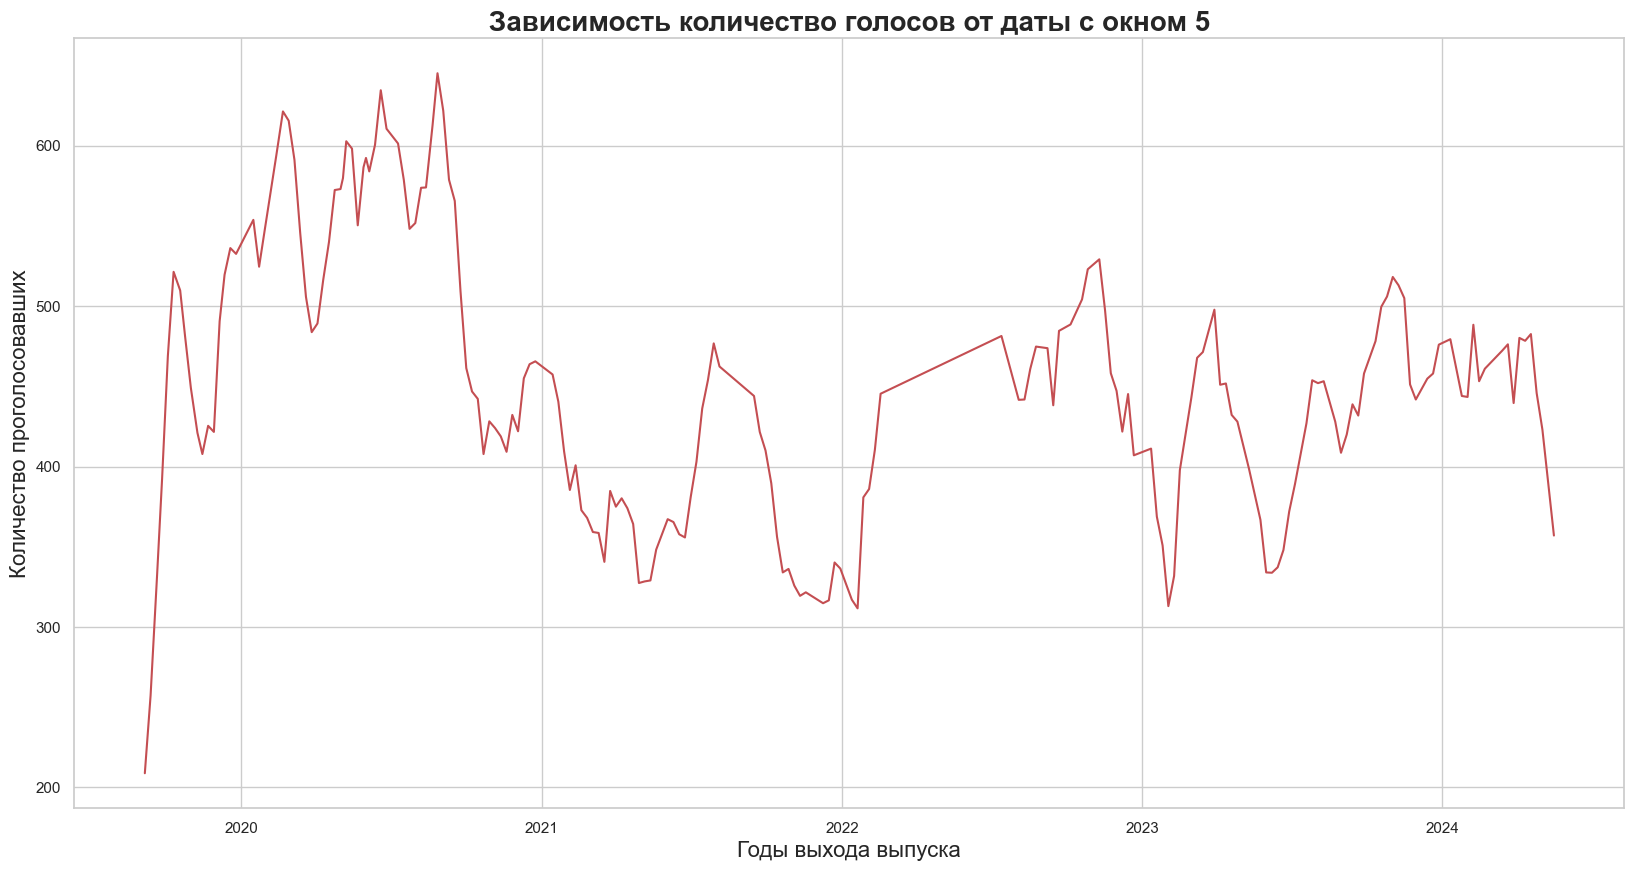

In [248]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 10))

df['Всего_rolling'] = df['Всего'].rolling(window=5).mean()
sns.lineplot(x='Дата', y='Всего_rolling', data=df, color='r')


plt.xlabel('Годы выхода выпуска', fontsize=16)
plt.ylabel('Количество проголосовавших', fontsize=16)
plt.title('Зависимость количество голосов от даты c окном 5', fontsize=20, fontweight='bold')
plt.show()






Из графика видно, что опросы стали проводиться примерно осенью 2019 года. Можно предположить, что выпуски начали выходить примерно в то же время.
Примерно за год количество голосов в опросах выросло примерно в 3 раза и к осени 2020 года достигло своего локального максимума.
С 2021 года и по наше время количество проголосовавших колеблется примерно от 300 до 500 

## Разбивка стартапов по группам

In [249]:
keywords = {
    'IT' : ['it', 'ai', 'искуственн', 'интеллект'],
    'Маркетинг_и_реклама' : ['реклам', 'маркетинг', 'анализ', 'акци', 'контент'],
    'Фриланс': ['фриланс', 'удален', 'самозанят'],
    'Бизнес' : ['b2b', 'бизнес', 'бизнеса', 'сотрудничеств'],
    'Медицина' : ['диагностик ', 'профилактик', 'медицин', 'врач', 'докт', 'хирург ', 'операц', 'маломобильных', 'процедур','здоровь', 'вирус'],
    'Образование': ['студент', 'университет', 'школ', 'образован', 'универ', 'экзамен', 'курс', 'общежит', 'образован'],
    
    'Музыка': ['музык', 'песн', 'звук', 'аккорд', 'мелод'],
    'Спорт': ['тренировк', 'фитнес', 'физкультур', 'атлетик', 'кардио', 'нагруз', 'сорев', 'экипиров', 'упражнен'],
    
    
    'Транспорт_и_доставка': ['ремонт', 'машина', 'техобслуж', 'кузов', 'запчаст', 'транспорт', 'курьер', 'доставк', 'груз', 'логистик', 'автомобил'],
    'Поездки_и_путешествия': ['поездк', 'туризм', 'путешеств', 'путевк', 'экскурси', 'курорт', 'проживание', 'бронирован'],
    'Кулинария': ['кухн', 'повар', 'еда', 'пищ', 'рецепт', 'ингредиент', 'блюд'],
    
    
}

def categorize(description):
    matched_categories = []
    words_in_description = description.lower().split()  # Разбиваем описание на слова
    
    for category, words in keywords.items():
        if any(any(word.startswith(keyword) for keyword in words) for word in words_in_description):
            matched_categories.append(category)
            
    return ', '.join(matched_categories) if matched_categories else 'Прочее'

# Пример датафрейма
df['Категория'] = df['Описание'].apply(categorize)

# Вывести результат
df['Категория'].unique()


array(['Маркетинг_и_реклама, Бизнес', 'Маркетинг_и_реклама, Медицина',
       'Бизнес', 'IT, Транспорт_и_доставка',
       'Бизнес, Транспорт_и_доставка', 'Прочее', 'Транспорт_и_доставка',
       'Маркетинг_и_реклама', 'Бизнес, Медицина', 'Медицина',
       'IT, Маркетинг_и_реклама', 'IT, Бизнес', 'Музыка',
       'Бизнес, Образование', 'Образование', 'IT', 'IT, Спорт',
       'IT, Бизнес, Поездки_и_путешествия', 'Фриланс',
       'Маркетинг_и_реклама, Транспорт_и_доставка',
       'Маркетинг_и_реклама, Образование', 'IT, Медицина',
       'Маркетинг_и_реклама, Бизнес, Транспорт_и_доставка', 'Спорт',
       'Кулинария', 'Поездки_и_путешествия',
       'Маркетинг_и_реклама, Медицина, Транспорт_и_доставка, Кулинария',
       'Маркетинг_и_реклама, Поездки_и_путешествия',
       'Медицина, Образование, Спорт',
       'Маркетинг_и_реклама, Бизнес, Медицина', 'IT, Медицина, Спорт'],
      dtype=object)



Для разбивки используются ключевые слова, которые наиболее подходят для выбраной категории. Слова выбирались по принципу запроса "топ-10 слов на тему "нужная тема", затем был проведен осмотр на наличие и удаление общих слов (слов с общими корнями, по типу "авто"), также переработан подход к парсингу: теперь слова в описании должны НАЧИНАТЬСЯ с ключевых слов, а не просто содержать корни в любом месте слова. После этого был проведен вторичный осмотр на "откровенно" ложные данные. Поскольку изначально не стоит задача идеально распределить все стартапы, а лишь раздеить их "условные" группы, основываясь на вторичную проверку, а также на получившиеся графики, можно сделать вывод о том, что IT - как и ожидалось, имеет наибольшую долю



### Примеры случайных стартапов из каждой категории


In [250]:


# Функция для выбора случайного стартапа в каждой категории
def get_random_startup_by_category(df, columns_to_display):
    # Проверка на наличие всех столбцов в DataFrame
    missing_columns = [col for col in columns_to_display if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Следующие столбцы отсутствуют в DataFrame: {missing_columns}")
    
    random_startups = []
    grouped = df.groupby('Категория')  # Группируем по категории
    
    for category, group in grouped:
        random_startup = group.sample(1)  # Выбираем 1 случайный стартап из группы
        random_startups.append(random_startup)
    
    # Соединяем результаты в один DataFrame
    result_df = pd.concat(random_startups)
    
    # Отображаем только нужные столбцы
    return result_df[columns_to_display]

# Пример вызова
columns_to_display = ['Название', 'Описание', 'Категория']  
random_startups_df = get_random_startup_by_category(df, columns_to_display)

random_startups_df

,Название,Описание,Категория
38,SmartBot,"Cистема управления парковками на базе смарт-технологий и искусственного интеллекта. Цель – оптимизация распределения парковочных мест, снижение заторов и повышения удобства для водителей.",IT
90,AI Eye,"AI Eye - B2B SaaS приложение для контроля действий водителей и предотвращения ДТП. С помощью недорогого смартфона и обычной wi-fi камеры мы распознаём отвлечённое вождение и усталость, предупреждаем водителя и передаём видеозапись события на сервер","IT, Бизнес"
51,Pinsteps,"Пересаживаем рынок экскурсий и гидов на цифровые маршруты, в которые с AI интегрированы локальные бизнесы. Создаем экосистемы для городов, объединяющие всех участников. Умудрились сделать успешный пилот в разгар пандемии в Израиле.","IT, Бизнес, Поездки_и_путешествия"
25,Brainbox.vc,"Brainbox.VC – краудинвестинговая платформа в РФ (лицензия Банка России №77). Строим площадку, на которой IT-стартапы на ранней стадии смогут найти (1) инвесторов, (2) специалистов. Саму платформу развивает сообщество brainbox.team и сейчас мы ищем новых участников сообщества, которые готовы финансировать проект, купив его акции.","IT, Маркетинг_и_реклама"
95,Sober One,"Sober One — мобильное приложение с AI, предлагающее людям планы помощи для осознания и решения проблем, связанных с алкоголем и злоупотреблением психоактивными веществами (substance abuse problems). Такие проблемы есть у 1,5 млрд человек, но помощь получают менее 5%. Существующие решения предлагают лечение, но люди не хотят лечиться. Наше приложение предоставляет знания, научно обоснованные инструменты и поддержку, помогая решить проблему без посещения врача или программы лечения.","IT, Медицина"
197,Azura AI,"Azura AI разрабатывает сервис для поддержания и профилактики здоровья, который:\n— хранит и автоматически собирает медицинские данные пользователя, в том числе и с фитнес-трекеров,\n— предоставляет персональные рекомендации по улучшению здоровья,\n— предсказывает вероятности возникновения заболеваний.\n\nРабота сервиса основана на применении искусственного интеллекта. В команде Azure AI есть и специалисты по ИИ, и врачи.","IT, Медицина, Спорт"
42,FitMind.ai,"AI-ассистент для онлайн тренеров по фитнесу и велнесу, который помогает им качественнее отвечать на вопросы клиентов и экономить время","IT, Спорт"
96,OMNIC,"OMNIC — IT-продуктовая компания, специализирующаяся на разработке и производстве программно-аппаратных комплексов в сфере самообслуживания для ритейла, логистики и HoReCa. Мы создаем продукты, которые позволяют компаниям автоматизировать процесс взаимодействия с клиентами и решить вопрос «последней мили», а клиентам экономить время на рутине, получая качественный и удобный сервис в наиболее удобном месте.","IT, Транспорт_и_доставка"
11,Freedom.bi,"Freedom.bi предлагает единую облачную платформу для комплексной автоматизации бизнес-процессов, включая ERP, CRM, производство, управление задачами, склад, финансы и бизнес-аналитику",Бизнес
9,RecPlace,"Платформа комплексного развития бизнеса, силами ИИ, обученного на опыте экспертов в вашей нише. С помощью ИИ RecPlace помогает настраивать эффективное управление, привлечение клиентов и увеличение операционной эффективности. Проект ориентирован на малый и микробизнес. По оценке компании, в этом сегменте более 6,1 млн микробизнесов. И у них нет маркетологов и доступа к эффективным инструментам для роста, что приводит к закрытию 95% новых предприятий в течение первых трех лет","Бизнес, Медицина"


### Наиболее популярные категории в порядке убывания

In [251]:
# Функция для подсчета всех категорий, содержащих подкатегорию
def count_subcategory_occurrences(df, subcategories):
    # Разделение категорий на отдельные строки
    categories = df['Категория'].str.split(', ', expand=True)
    categories = categories.melt(value_name='Категория').dropna()['Категория']
    
    # Подсчет всех категорий, содержащих каждую подкатегорию из списка
    results = {}
    for subcategory in subcategories:
        count = categories[categories.str.contains(subcategory, case=True)].count()
        results[subcategory] = count
    
    # Сортировка по убыванию значений
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_results

# Список подкатегорий, которые нужно проверить
subcategories_list = ['Прочее', 'IT', 'Бизнес', 'Музыка', 'Фриланс', 'Медицина', 'Спорт', 'Транспорт_и_доставка', 'Поездки_и_путешествия', 'Кулинария', 'Образование', 'Маркетинг_и_реклама']

# Подсчет количества всех категорий для каждой подкатегории в списке
subcategory_counts = count_subcategory_occurrences(df, subcategories_list)
subcategory_counts


{'Прочее': np.int64(77),
 'Маркетинг_и_реклама': np.int64(38),
 'Бизнес': np.int64(27),
 'Транспорт_и_доставка': np.int64(24),
 'IT': np.int64(22),
 'Медицина': np.int64(18),
 'Поездки_и_путешествия': np.int64(8),
 'Образование': np.int64(8),
 'Кулинария': np.int64(6),
 'Спорт': np.int64(5),
 'Музыка': np.int64(2),
 'Фриланс': np.int64(1)}

### Визуализируем данные

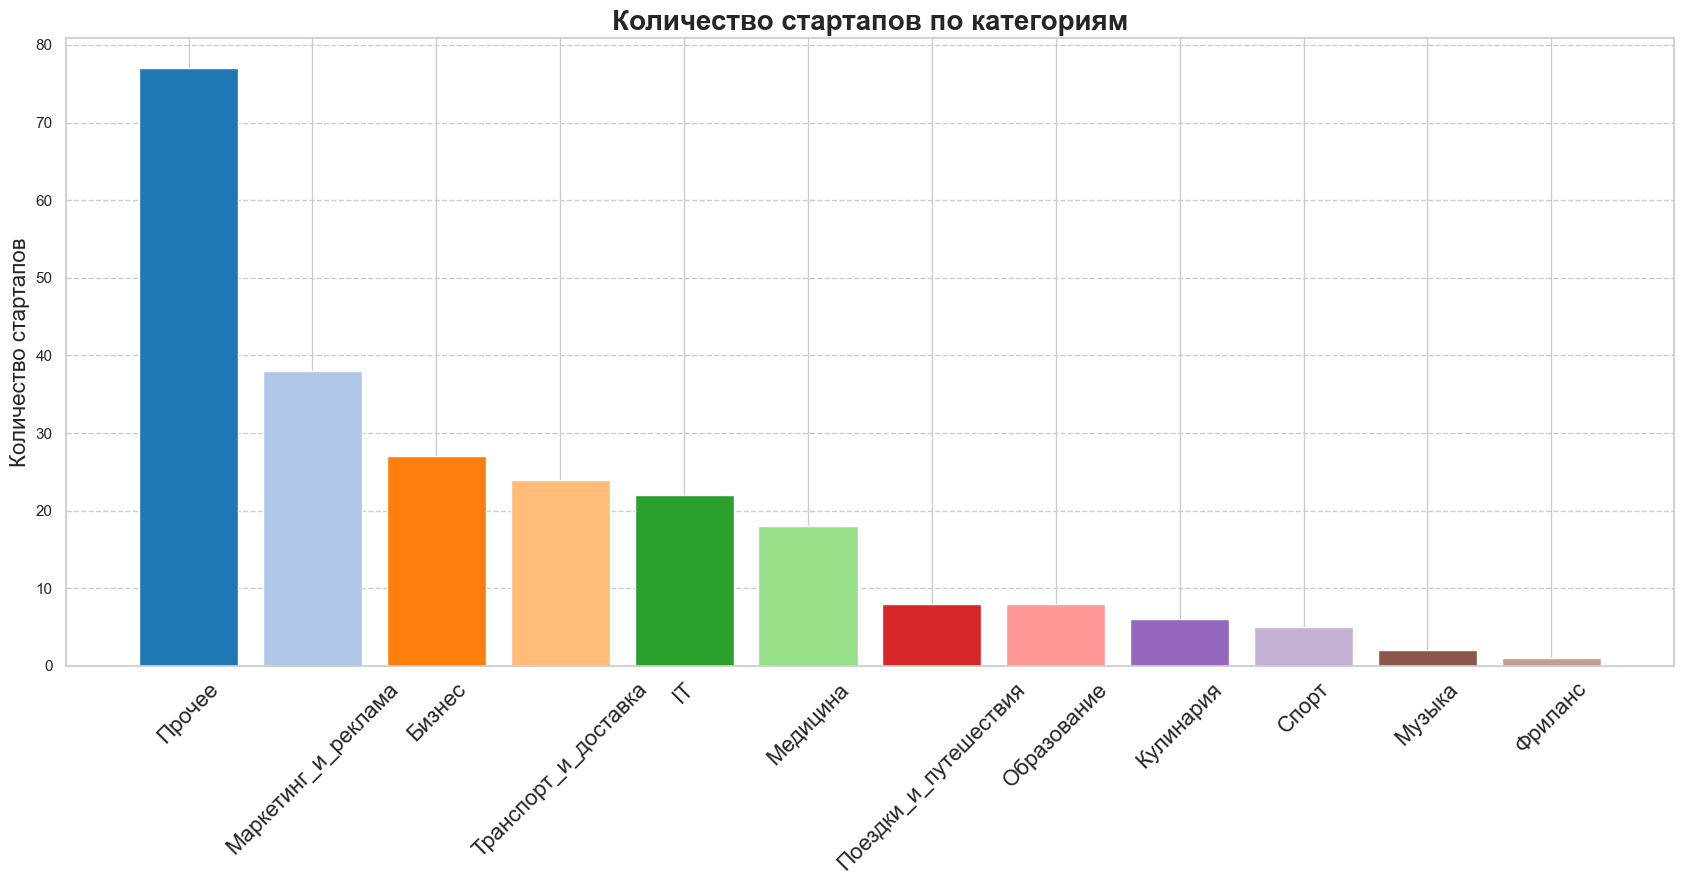

In [252]:
category_labels = list(subcategory_counts.keys())
category_counts = list(subcategory_counts.values())



colors = plt.get_cmap('tab20').colors

plt.figure(figsize=(17, 9))
plt.bar(
    category_labels, 
    category_counts, 
    color=colors[:len(category_labels)]  # Убедитесь, что достаточно цветов для всех категорий
)

plt.title('Количество стартапов по категориям', fontsize=20, fontweight='bold')
plt.ylabel('Количество стартапов', fontsize=16)
plt.xticks(rotation=45, fontsize=16)  # Поворот меток категорий, если они длинные
plt.grid(axis='y', linestyle='--')  # Сетка по вертикальной оси
plt.tight_layout()  # Подгонка для отображения меток
plt.show()



Видим, что распределение по заданным (предполагаемым) группам в основном сосредоточилось на бизнес и IT проектках.

Это может быть связано с тем, что в настоящее время цифровые технологии применяются в любой области, что потверждается данными из массива уникальных подгрупп, почти в каждой из которых есть IT

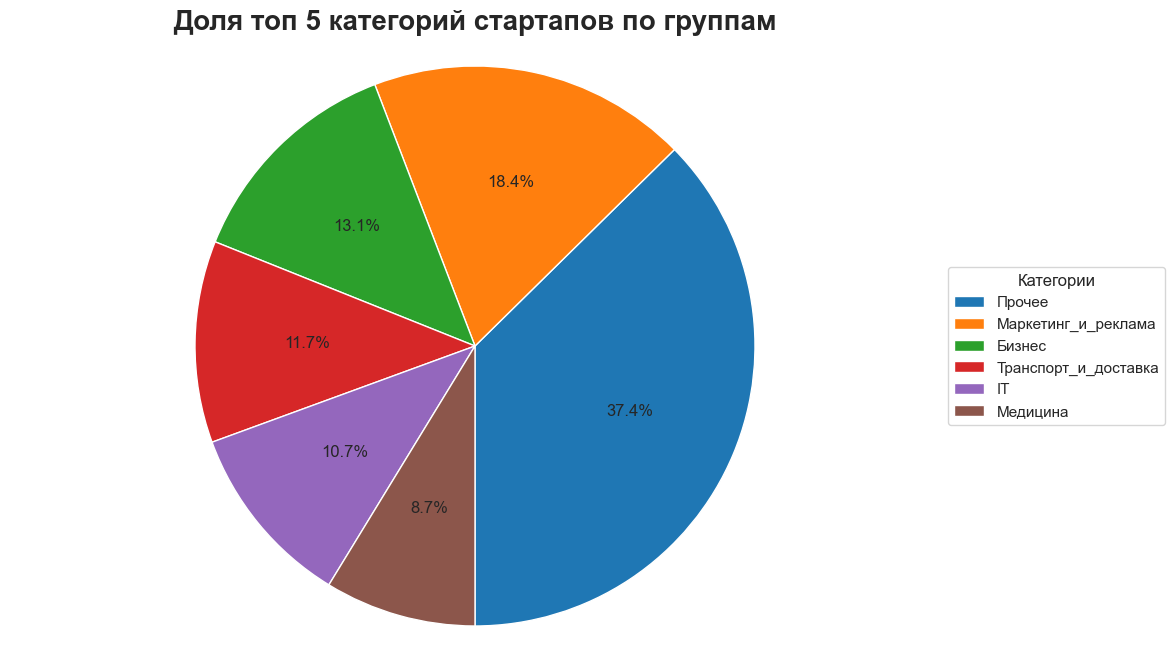

In [253]:

merge_to_other = ['Спорт', 'Музыка', 'Фриланс', 'Кулинария', 'Поездки_и_путешествия', 'Образование']

category_labels = list(subcategory_counts.keys())
category_counts = list(subcategory_counts.values())
other_count = 0

# Создаем новые списки для обновления
for label, count in zip(category_labels, category_counts):
    if label in merge_to_other:
        other_count += count  # Суммируем категории, которые пойдут в "Прочее"

# Удаляем объединенные категории из исходных списков
category_labels = [label for label in category_labels if label not in merge_to_other]
category_counts = [count for label, count in zip(category_labels, category_counts) if label not in merge_to_other]

# Определение цветов для каждого сегмента
colors = plt.get_cmap('tab10').colors

# Создание круговой диаграммы с объединением в "Прочее"
plt.figure(figsize=(12, 8))
plt.pie(
    category_counts,
    autopct='%1.1f%%', 
    colors=colors[:len(category_labels)],  # Убедитесь, что достаточно цветов для всех категорий
    startangle=-90
)

# Настройка легенды
plt.legend(
    category_labels,
    title="Категории",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Доля топ 5 категорий стартапов по группам', fontsize=20, fontweight='bold')
plt.axis('equal')  # Оформление диаграммы в круг
plt.show()



Заметим, что суммарно категории IT и бизнес содержат больше половины всех проектов из исходных данных (64.4%)

Также стоит отметить, что пятая часть всех проектов либо не попала ни в одну из категорий, либо же процент от общего числа составлял меньше 5 %
Это может быть связано с тем, что разбивка по категориям имеют определенную погрешность
